<h1 align="center">Exploratory Analysis : Game of Thrones</h1> 
![Game of Thrones](https://upload.wikimedia.org/wikipedia/en/d/d8/Game_of_Thrones_title_card.jpg)

One of the most popular television series of all time, Game of Thrones is a fantasy drama set in fictional continents of Westeros and Essos filled with multiple plots and a huge number of characters all battling for the Iron Throne! It is an adaptation of _Song of Ice and Fire_ novel series by **George R. R. Martin**.

Being a popular series, it has caught the attention of many, and Data Scientists aren't to be excluded. This notebook presents **Exploratory Data Analysis (EDA)** on the _Kaggle_ dataset enhanced by _Myles O'Neill_ (more details: [click here](https://www.kaggle.com/mylesoneill/game-of-thrones)). This dataset is based on a combination of multiple datasets collected and contributed by multiple people. We utilize the ```battles.csv``` in this notebook. The original battles data was presented by _Chris Albon_, more details are on [github](https://github.com/chrisalbon/war_of_the_five_kings_dataset)

---
The image was taken from Game of Thrones, or from websites created and owned by HBO, the copyright of which is held by HBO. All trademarks and registered trademarks present in the image are proprietary to HBO, the inclusion of which implies no affiliation with the Game of Thrones. The use of such images is believed to fall under the fair dealing clause of copyright law.

## Import required packages

In [2]:
import numpy as np               # arrays  1d/ 2d
import pandas as pd             # Datafrmaes
from collections import Counter

# pandas display data frames as tables
from IPython.display import display, HTML

# plotting
import seaborn as sns           # plotting graphs
import matplotlib.pyplot as plt   # plots 
%matplotlib inline   
# to display output graphs inconsole

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (35, 15),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('poster')

plt.rcParams.update(params)

## Load Dataset

In this step we load the ```battles.csv``` for analysis

In [9]:
# load dataset
battles_df = pd.read_csv('battles.csv')

In [11]:
# Display sample rows
battles_df.head(10)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


## Explore raw properties

In [12]:
# display rows and columns size from battles_df
battles_df.shape

(38, 25)

In [14]:
# Number of attributes/columns available in the dataset

print("Number of attributes ",battles_df.shape[1])

# print("Number of attributes available in the dataset = {}".format(battles_df.shape[1]))

Number of attributes  25


In [13]:
# View available columns and their data types
battles_df.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

In [15]:
battles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

<h3 align="center">Battles for the Iron Throne</h3> 
![Throne](https://res.cloudinary.com/beamly/image/upload/s--FJg3Gevq--/c_fill,g_face,q_70,w_479/f_jpg/v1/tvbuzz/sites/7/2015/02/GameofThronesIronThrone.jpg)

In [16]:
# Analyze properties of numerical columns
battles_df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


---

## Number of Battles Fought
This data is till **season 5** only

In [17]:
print("Number of battles" ,battles_df.shape[0]) # number of rows ~ battles fought

# print("Number of battles fought={}".format(battles_df.shape[0]))

Number of battles 38


## Battle Distribution Across Years
The plot below shows that maximum bloodshed happened in the year 299 with a total of 20 battles fought!

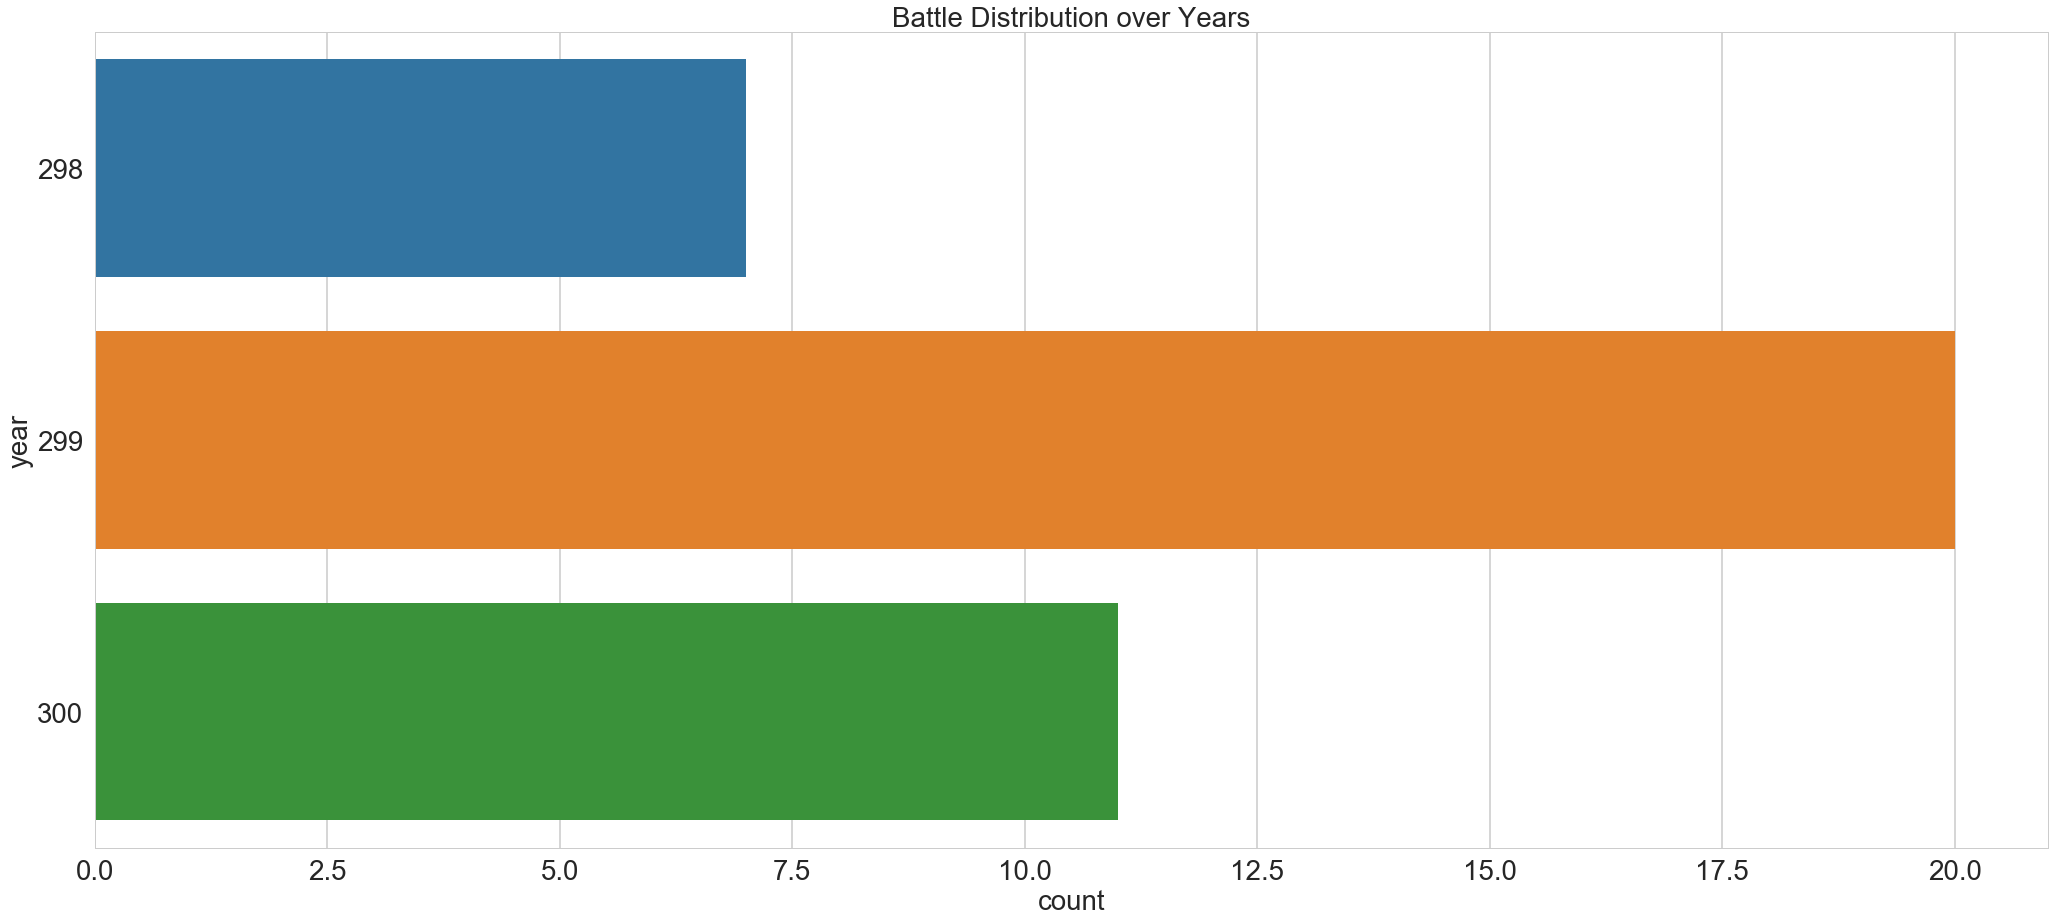

In [18]:
sns.countplot(y='year',data=battles_df)
plt.title('Battle Distribution over Years')
plt.show()

## Which Regions saw most Battles?
<img src="https://racefortheironthrone.files.wordpress.com/2016/11/riverlands-political-map.jpg?w=580&h=781" alt="RiverLands" style="width: 200px;" align="left"/> **Riverland**s seem to be the favorite battle ground followed by the famous **The North**. Interestingly, till season 5, there was only 1 battle beyond the wall. Spoiler Alert: Winter is Coming!

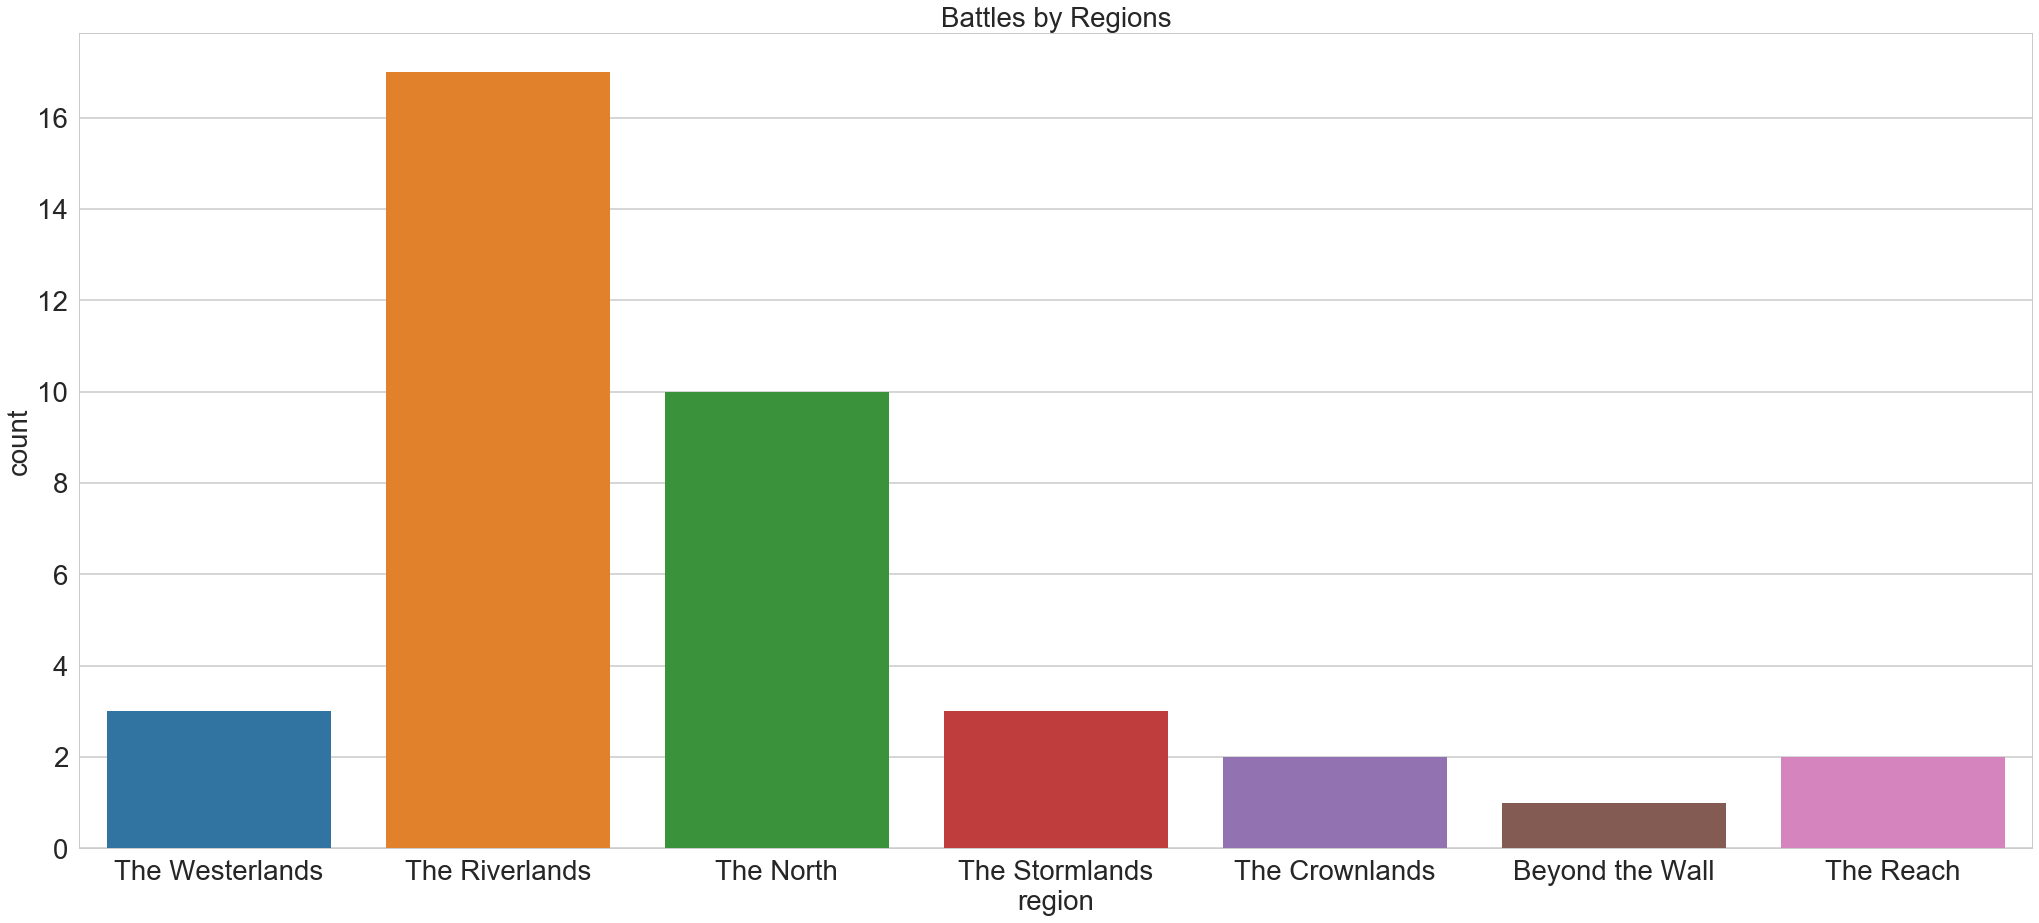

In [19]:
sns.countplot(x='region',data=battles_df)
plt.title('Battles by Regions')
plt.show()

### Death or Capture of Main Characters by Region

No prizes for guessing that Riverlands have seen some of the main characters being killed or captured. Though _The Reach_ has seen 2 battles, none of the major characters seemed to have fallen there.

In [ ]:
# select region , sum(major_death), sum(major_capture)
# from battels_df
# group by region

In [32]:
temp_df = battles_df.groupby('region').agg({'major_death':'sum','major_capture':'sum'})

temp_df.loc[:,'dummyCol'] = 'dummy'

temp_df

,major_death,major_capture,dummyCol
region,,,
Beyond the Wall,1.0,1.0,dummy
The Crownlands,2.0,1.0,dummy
The North,1.0,2.0,dummy
The Reach,0.0,0.0,dummy
The Riverlands,6.0,6.0,dummy
The Stormlands,1.0,0.0,dummy
The Westerlands,2.0,1.0,dummy


In [36]:
temp_df.columns

Index(['major_death', 'major_capture', 'dummyCol'], dtype='object')

In [21]:
temp_df = battles_df.groupby('region').agg({'major_death':'sum','major_capture':'sum'}).reset_index()

temp_df.loc[:,'dummyCol'] = 'dummy'

temp_df

,region,major_death,major_capture,dummyCol
0,Beyond the Wall,1.0,1.0,dummy
1,The Crownlands,2.0,1.0,dummy
2,The North,1.0,2.0,dummy
3,The Reach,0.0,0.0,dummy
4,The Riverlands,6.0,6.0,dummy
5,The Stormlands,1.0,0.0,dummy
6,The Westerlands,2.0,1.0,dummy


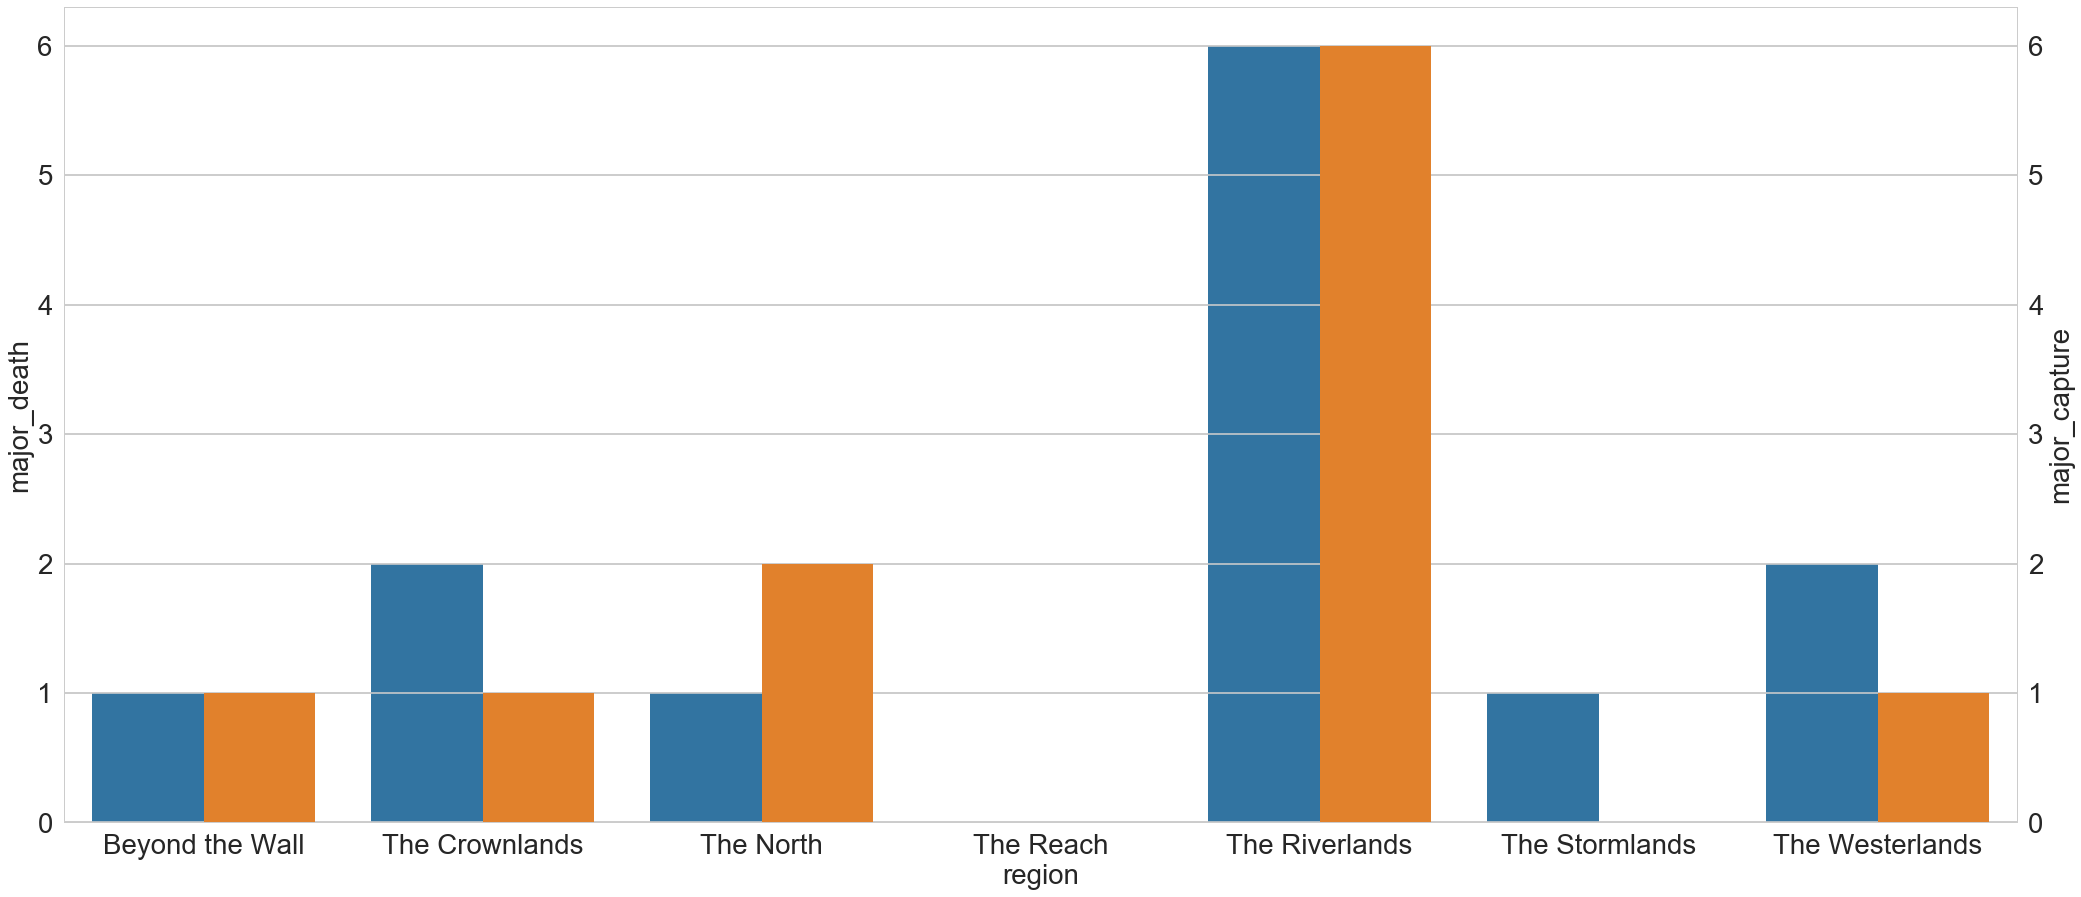

In [31]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x="region", y="major_death", 
            hue='dummyCol', data=temp_df, 
             ax = ax1, 
            hue_order=['dummy','hideMC'])

sns.barplot(x="region", y="major_capture", 
            data=temp_df, hue='dummyCol',
             ax = ax2, 
            hue_order=['hideMD','dummy'])

ax1.legend_.remove()
ax2.legend_.remove()


## Who Attacked the most?
The Baratheon boys love attacking as they lead the pack with 38% while Rob Stark has been the attacker in close second with 27.8% of the battles.

<img src="https://oyster.ignimgs.com/mediawiki/apis.ign.com/game-of-thrones/3/3b/1x08-The-Pointy-End-game-of-thrones-22640084-1024-576.png?width=640" alt="joffrey" style="width: 200px;" align="left"/>  <img src="https://meninblazers.com/.image/t_share/MTMwMDE5NTU4NTI5NDk1MDEw/tumblr_mkzsdafejy1r2xls3o1_400.png" alt="robb" style="width: 200px; height: 200px" align="right"/>

In [38]:
attacker_king = battles_df.attacker_king.value_counts()
attacker_king

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

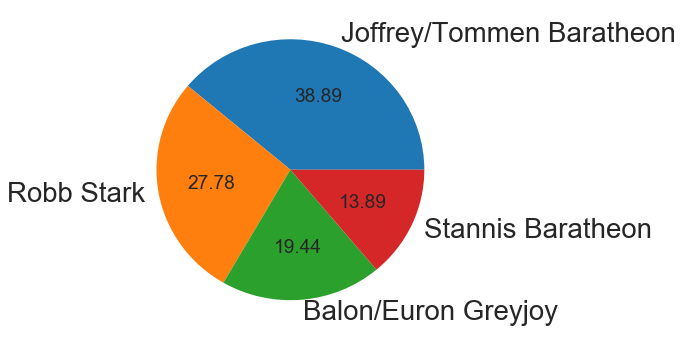

In [39]:
attacker_king = battles_df.attacker_king.value_counts()
attacker_king.name='' # turn off y-axis-label
attacker_king.plot.pie(figsize=(6, 6),autopct='%.2f')
plt.show()

## Who Defended the most?
Rob Stark and Baratheon boys are again on the top of the pack. Looks like they have been on either sides of the war lot many times.

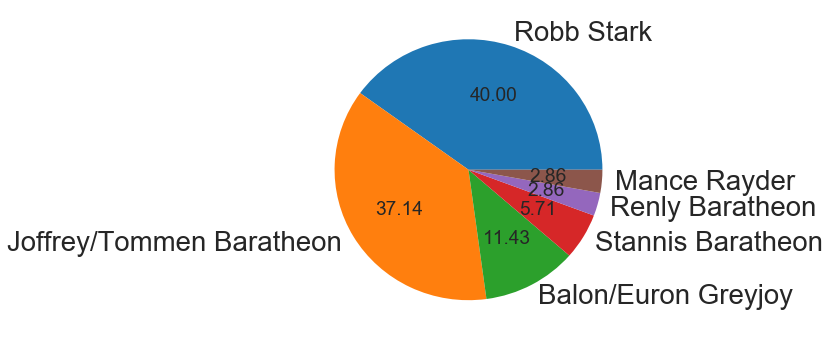

In [32]:
defender_king = battles_df.defender_king.value_counts()
defender_king.name='' # turn off y-axis-label
defender_king.plot.pie(figsize=(6, 6),autopct='%.2f')
plt.show()

## Battle Style Distribution
Plenty of battles all across, yet the men of Westeros and Essos are men of honor. 
This is visible in the distribution which shows **pitched battle** as the most common style of battle.

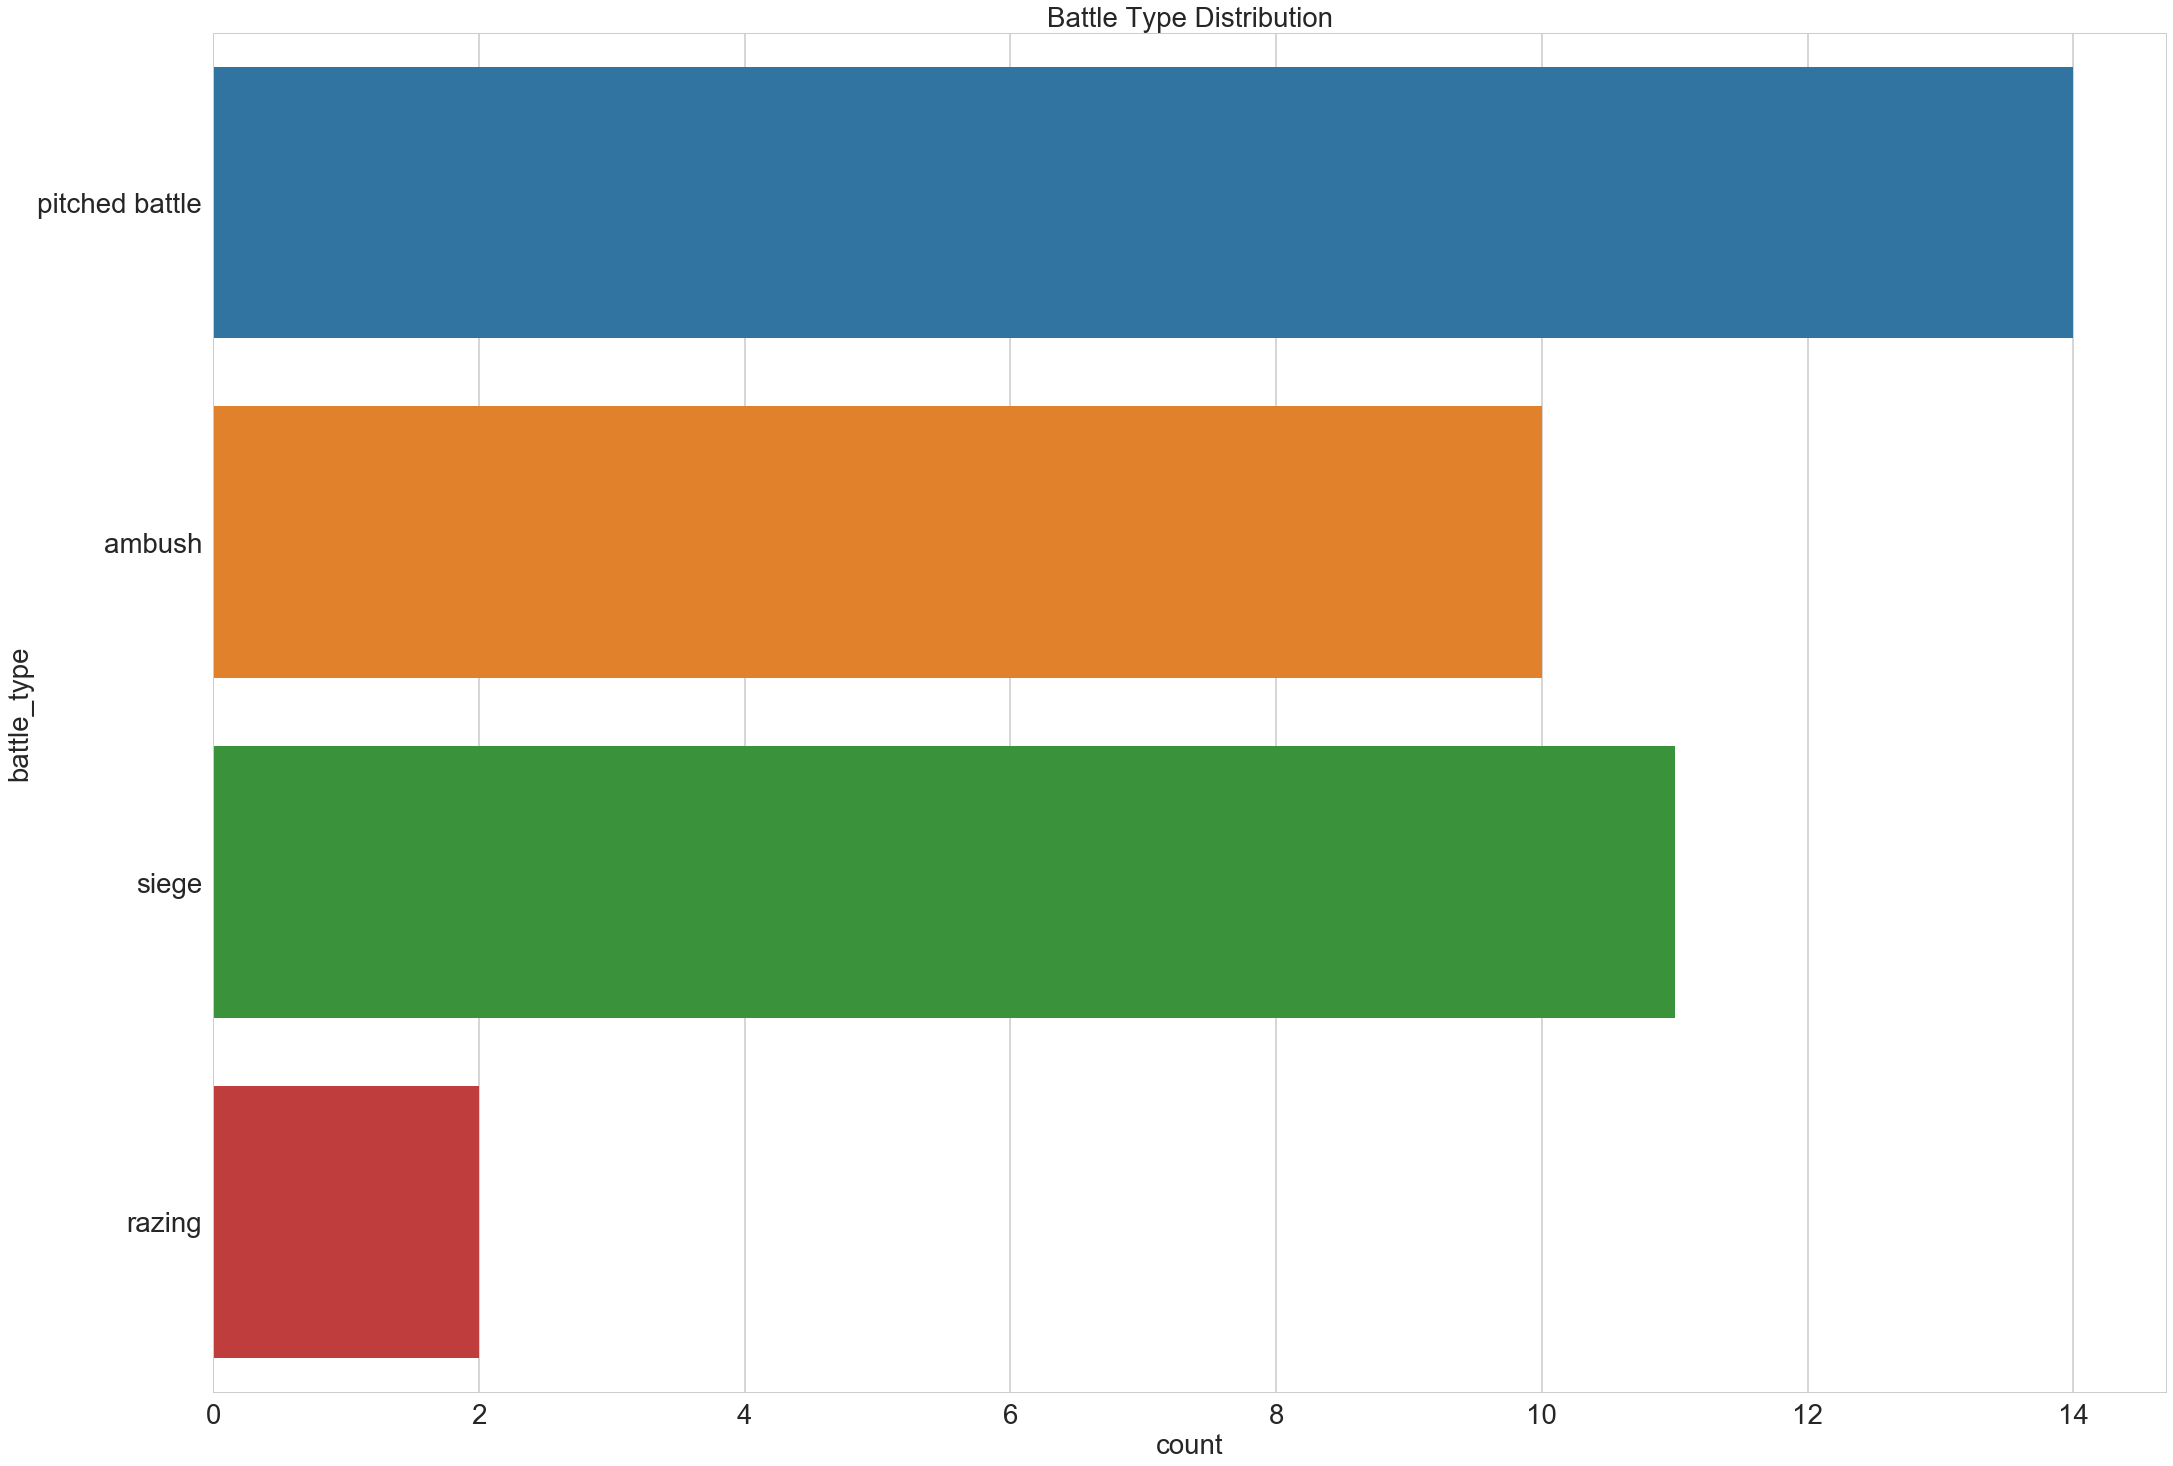

In [33]:
sns.countplot(y='battle_type',data=battles_df)
plt.title('Battle Type Distribution')
plt.show()

## Attack or Defend?
Defending your place in Westeros isn't easy, this is clearly visible from the fact that 32 out of 37 battles were won by attackers

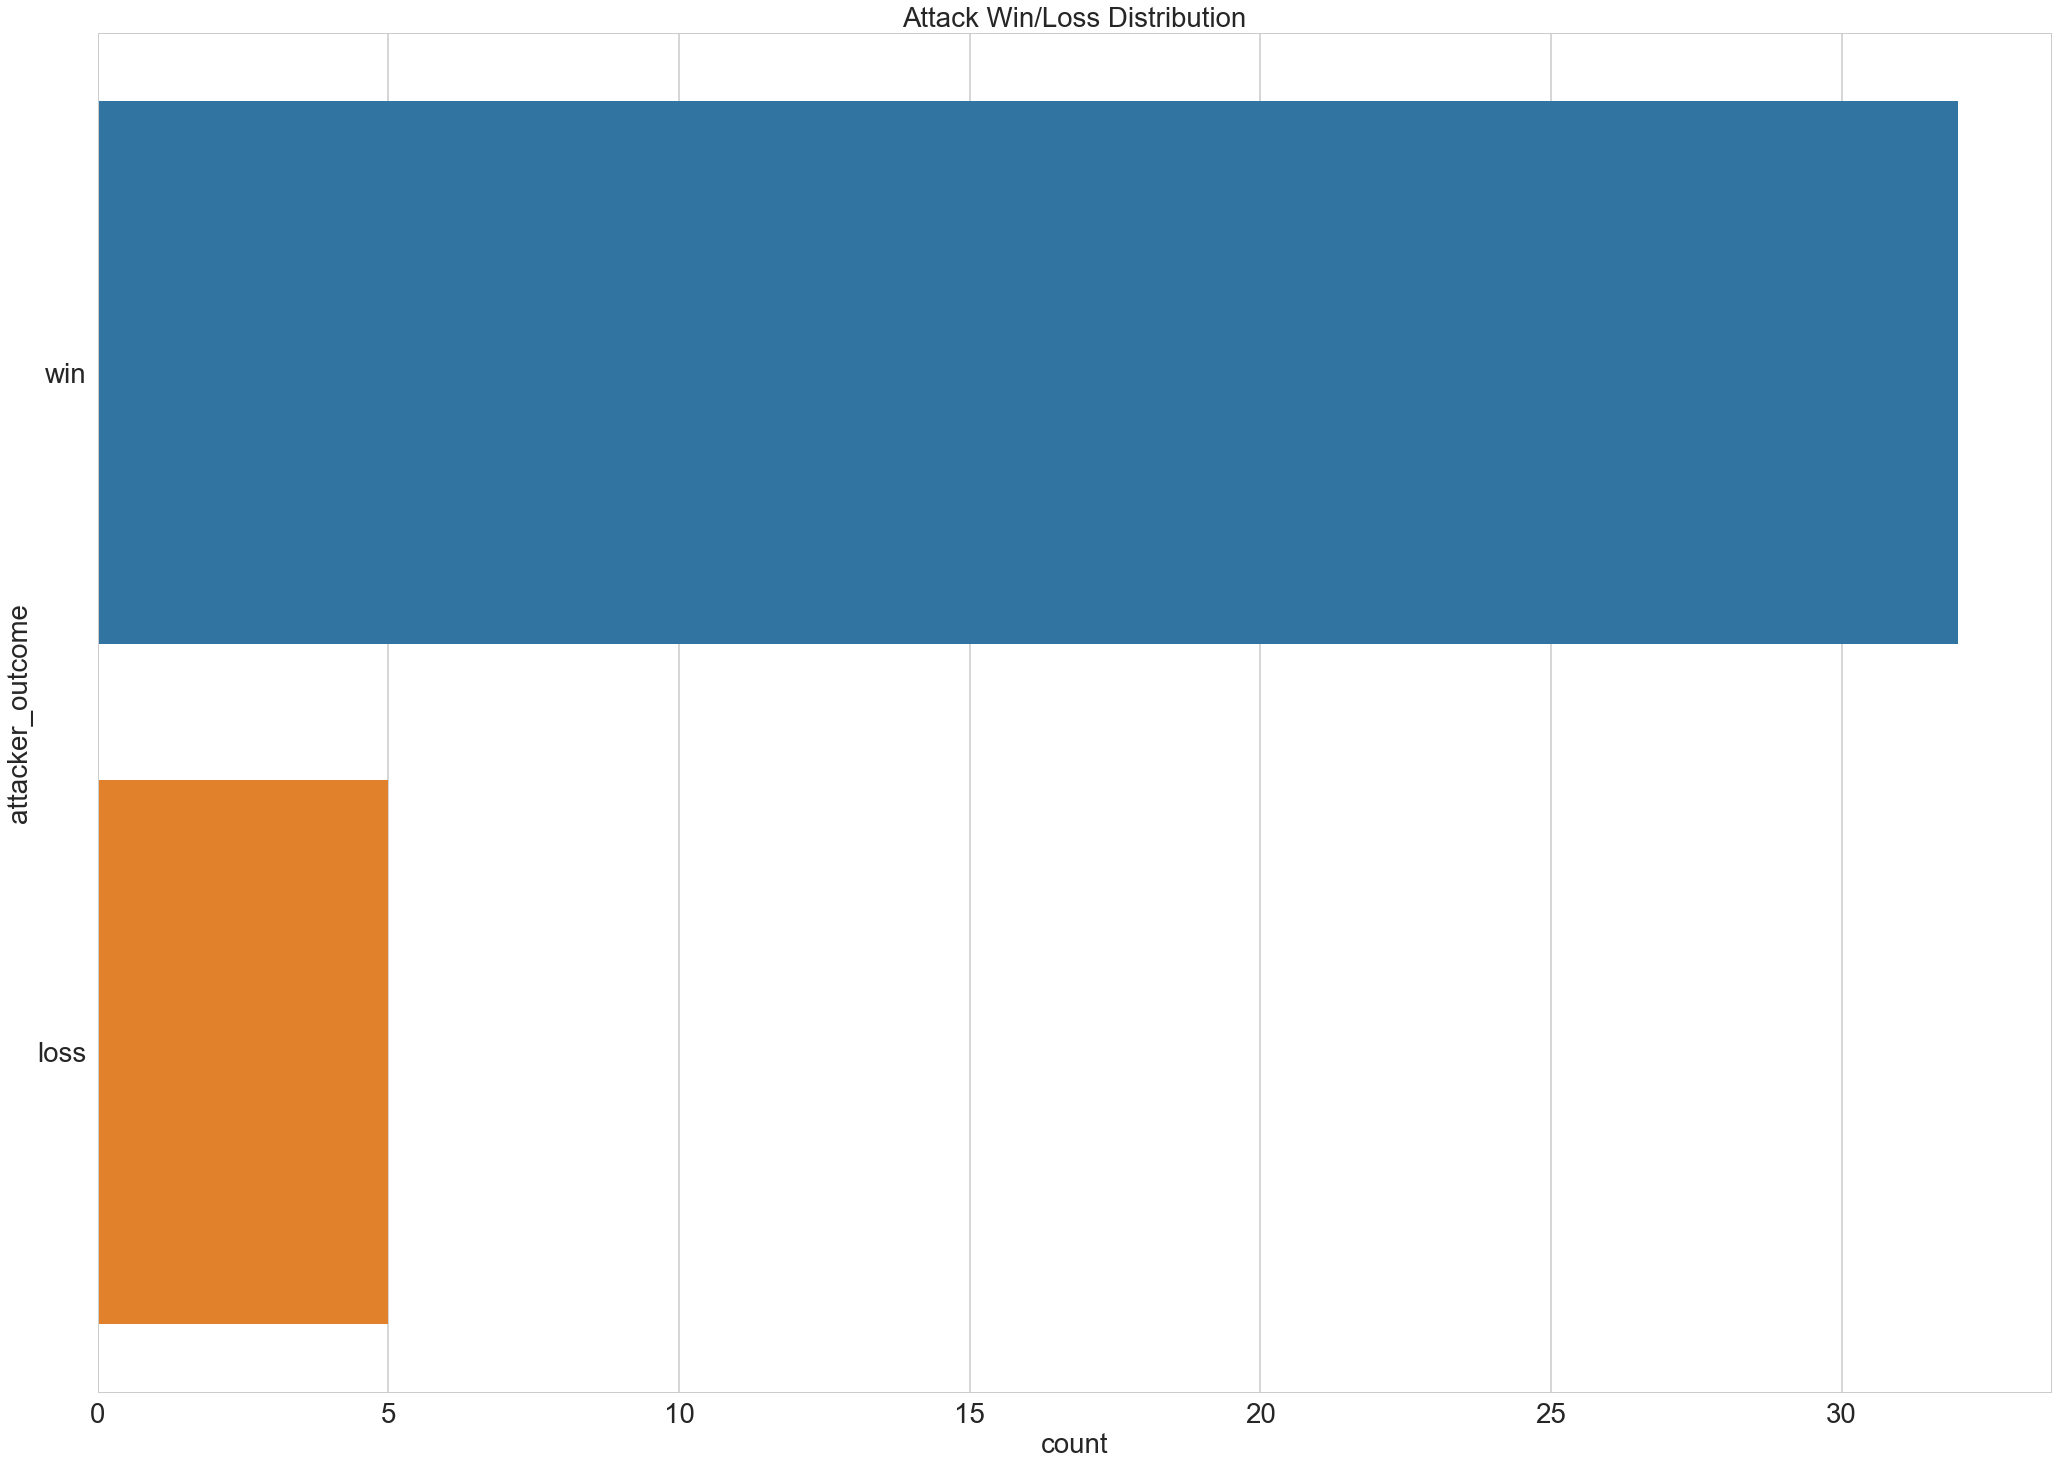

In [34]:
sns.countplot(y='attacker_outcome',data=battles_df)
plt.title('Attack Win/Loss Distribution')
plt.show()